<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/tf2ss_chapter_6_exmaple_6_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 5.8 MB/s eta 0:00:00


In [2]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Open loop TF =  
                                1
-----------------------------------------------------------------
s^8 + 3 s^7 + 10 s^6 + 24 s^5 + 48 s^4 + 96 s^3 + 128 s^2 + 192 s

Closed loop TF =  
                                  1
---------------------------------------------------------------------
s^8 + 3 s^7 + 10 s^6 + 24 s^5 + 48 s^4 + 96 s^3 + 128 s^2 + 192 s + 1

Poles =  [ 1.03755067+1.8302037j   1.03755067-1.8302037j  -2.20247417+0.j
 -1.25819493+1.60074134j -1.25819493-1.60074134j -0.17550542+2.16882675j
 -0.17550542-2.16882675j -0.00522647+0.j        ]
Zeros =  []


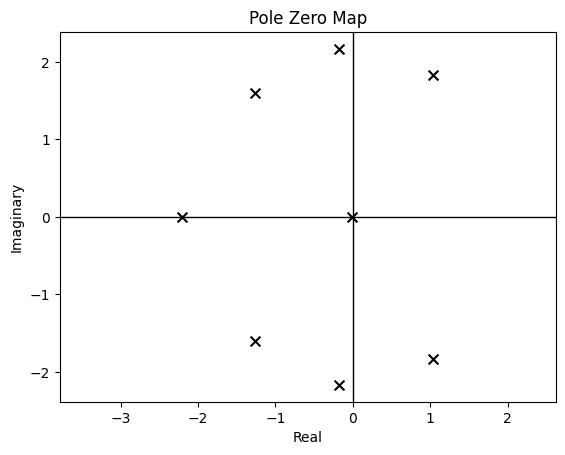

In [3]:
# Define your transfer function:
#G(s) = 128 / s(s^7+3s^6+10s^5+24s^4+48s^3+96s^2+128s+192)

# Coefficients of the numerator
num = [1]
# Coefficients of the denominator
den = np.polymul([1, 0],[1,3,10,24,48,96,128,192])

G = tf(num,den)
print ("Open loop TF = ", G)

# close loop transfer function
TF = feedback(G,1)
print ("Closed loop TF = ", TF)

(p,z) = pzmap(TF)

print("Poles = ",p)
print("Zeros = ",z)

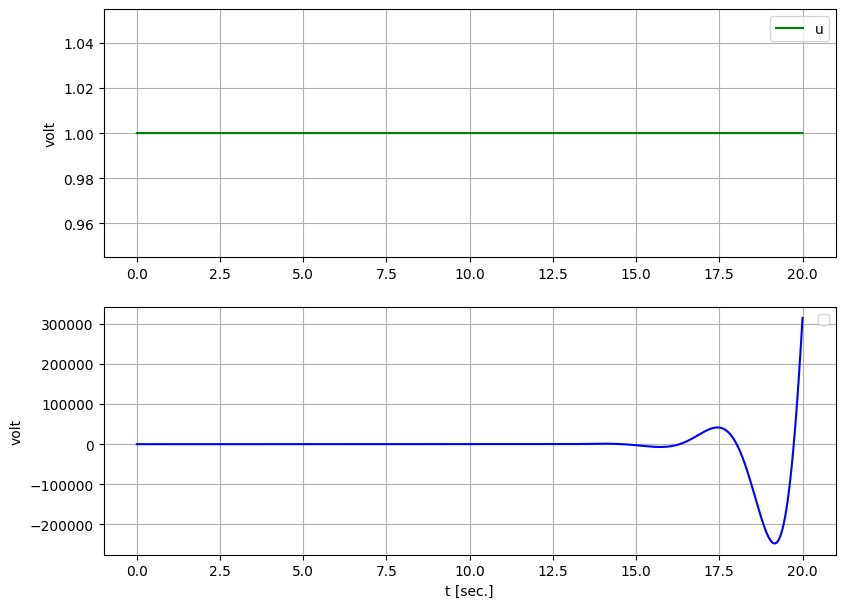

In [4]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 20
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(TF, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.subplot(2,1,1)
plt.plot(t, u, "green")

plt.grid()
plt.legend(labels =("u"))
plt.ylabel("volt")

plt.subplot(2,1,2)
plt.legend(labels =("y"))
plt.plot(t, y, "blue")
plt.grid()
plt.xlabel("t [sec.]")
plt.ylabel("volt")

plt.savefig("sim_tf.pdf")